In [1]:
#Relevant packages 
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import pickle
import plotly.express as px # remember to use px.choropleth to plot depression on map
import plotly.graph_objects as go
sns.set()

#set the number of columns and rows given in each table
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',100)

#ignore warnings caused by version errors
import warnings
warnings.filterwarnings('ignore')

#impute missings with KNN
from sklearn.impute import KNNImputer

#to convert country codes to alpha 3
!pip install pycountry_convert
from pycountry_convert import country_alpha2_to_country_name, country_name_to_country_alpha3 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score 

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


In [2]:
dataset = pd.read_csv("data.csv", delimiter="\t")
dataset

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,country,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,8,2044,4,34,2153,4,33,2416,4,10,2818,4,13,2259,2,21,5541,1,38,4441,4,31,2451,4,24,3325,4,14,1416,4,37,5021,4,27,2342,4,39,2480,3,6,2476,4,35,1627,3,17,9050,3,30,7001,1,11,4719,4,20,2984,4,36,1313,4,42,2444,4,1,9880,4,2,4695,4,5,1677,3,4,6723,4,3,5953,2,26,8062,4,12,5560,4,7,3032,2,29,3316,3,40,3563,4,23,5594,4,41,1477,1,18,3885,2,9,5265,4,19,1892,3,22,4228,4,32,1574,4,15,2969,IN,2,19,167,166,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,28,3090,4,10,5078,4,40,2790,3,18,3408,4,1,8342,3,37,916,2,32,1537,2,21,3926,2,25,3691,4,26,2004,4,4,8888,3,27,4109,3,19,4058,4,12,3692,2,6,3373,1,23,6015,1,16,3023,2,22,2670,3,3,5727,1,39,3641,2,33,2670,2,7,7649,3,11,2537,3,5,2907,4,9,1685,3,41,4726,3,17,6063,2,20,3307,3,14,4995,3,38,2505,2,34,2540,2,31,4359,3,15,3925,4,13,4609,2,30,3755,2,42,2323,1,24,5713,2,8,1334,2,29,5562,US,2,1,193,186,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,13,6470,4,11,3927,3,9,3704,1,17,4550,3,5,3021,2,32,5864,4,21,3722,2,10,3424,1,36,3236,4,23,2489,1,34,7290,4,12,6587,4,22,3627,4,38,2905,2,18,2998,2,8,10233,1,16,4258,4,28,2888,3,4,59592,2,3,11732,4,2,8834,2,29,7358,1,30,4928,2,15,3036,1,19,4127,2,37,3934,2,26,10782,4,1,8273,3,39,3501,1,27,3824,4,25,2141,3,6,17461,4,24,1557,4,40,4446,4,42,1883,2,35,5790,2,14,4432,1,20,2203,4,31,5768,PL,2,5,271,122,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,27,4556,3,28,3269,3,26,3231,4,2,7138,2,19,3079,3,31,9650,3,17,4179,2,5,5928,1,21,2838,1,20,2560,4,29,5139,2,22,3597,2,35,3336,3,10,4506,1,14,2695,1,25,8128,2,15,3125,1,6,4061,1,40,4272,1,12,4029,1,9,5630,1,18,30631,2,24,9870,4,4,2411,1,16,9478,3,1,7618,3,32,12639,3,34,5378,1,41,8923,2,38,2977,4,3,5620,1,7,16760,1,8,6427,2,39,3760,1,13,4112,3,42,2769,4,33,4432,4,30,3643,2,36,3698,US,2,3,261,336,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,10,2802,4,2,5628,2,9,6522,4,34,2374,4,11,3054,4,7,2975,3,14,3524,2,33,3033,4,23,2132,4,17,1314,4,16,3181,4,26,2249,3,19,2623,4,35,3093,4,38,7098,4,37,1938,4,15,3502,3,32,4776,3,18,4463,4,4,2436,2,40,4047,4,31,3787,4,42,2102,2,1,12351,4,3,2410,2,22,5056,4,39,3343,3,27,3012,4,20,3520,4,8,1868,4,25,2536,3,24,3725,4,30,2130,3,29,3952,3,21,10694,3,41,3231,4,12,3604,4,28,1950,3,6,6265,MY,2,1766,164,157,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,2,3,10,1,10,2,1,4,Psychology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Columns: 172 entries, Q1A to major
dtypes: int64(170), object(2)
memory usage: 52.2+ MB


In [4]:
# Check for duplicates on each row.
dataset.duplicated().value_counts()

False    39775
dtype: int64

In [5]:
# Check for unique values.
dataset.nunique()

Q1A               4
Q1I              42
Q1E           10879
Q2A               4
Q2I              42
              ...  
race              7
voted             3
married           4
familysize       28
major          5309
Length: 172, dtype: int64

In [6]:
columns  = dataset.columns
print('Attributes',len(columns))

Attributes 172


## Data Preprocessing

In [7]:
data = pd.DataFrame(dataset)
data

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,Q4I,Q4E,Q5A,Q5I,Q5E,Q6A,Q6I,Q6E,Q7A,Q7I,Q7E,Q8A,Q8I,Q8E,Q9A,Q9I,Q9E,Q10A,Q10I,Q10E,Q11A,Q11I,Q11E,Q12A,Q12I,Q12E,Q13A,Q13I,Q13E,Q14A,Q14I,Q14E,Q15A,Q15I,Q15E,Q16A,Q16I,Q16E,Q17A,Q17I,Q17E,Q18A,Q18I,Q18E,Q19A,Q19I,Q19E,Q20A,Q20I,Q20E,Q21A,Q21I,Q21E,Q22A,Q22I,Q22E,Q23A,Q23I,Q23E,Q24A,Q24I,Q24E,Q25A,Q25I,Q25E,Q26A,Q26I,Q26E,Q27A,Q27I,Q27E,Q28A,Q28I,Q28E,Q29A,Q29I,Q29E,Q30A,Q30I,Q30E,Q31A,Q31I,Q31E,Q32A,Q32I,Q32E,Q33A,Q33I,Q33E,Q34A,Q34I,Q34E,Q35A,Q35I,Q35E,Q36A,Q36I,Q36E,Q37A,Q37I,Q37E,Q38A,Q38I,Q38E,Q39A,Q39I,Q39E,Q40A,Q40I,Q40E,Q41A,Q41I,Q41E,Q42A,Q42I,Q42E,country,source,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,8,2044,4,34,2153,4,33,2416,4,10,2818,4,13,2259,2,21,5541,1,38,4441,4,31,2451,4,24,3325,4,14,1416,4,37,5021,4,27,2342,4,39,2480,3,6,2476,4,35,1627,3,17,9050,3,30,7001,1,11,4719,4,20,2984,4,36,1313,4,42,2444,4,1,9880,4,2,4695,4,5,1677,3,4,6723,4,3,5953,2,26,8062,4,12,5560,4,7,3032,2,29,3316,3,40,3563,4,23,5594,4,41,1477,1,18,3885,2,9,5265,4,19,1892,3,22,4228,4,32,1574,4,15,2969,IN,2,19,167,166,1,5,7,7,7,7,7,5,1,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,1,1,2,3,2,2,16,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,28,3090,4,10,5078,4,40,2790,3,18,3408,4,1,8342,3,37,916,2,32,1537,2,21,3926,2,25,3691,4,26,2004,4,4,8888,3,27,4109,3,19,4058,4,12,3692,2,6,3373,1,23,6015,1,16,3023,2,22,2670,3,3,5727,1,39,3641,2,33,2670,2,7,7649,3,11,2537,3,5,2907,4,9,1685,3,41,4726,3,17,6063,2,20,3307,3,14,4995,3,38,2505,2,34,2540,2,31,4359,3,15,3925,4,13,4609,2,30,3755,2,42,2323,1,24,5713,2,8,1334,2,29,5562,US,2,1,193,186,6,5,4,7,5,4,7,7,1,5,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2,3,2,1,16,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,13,6470,4,11,3927,3,9,3704,1,17,4550,3,5,3021,2,32,5864,4,21,3722,2,10,3424,1,36,3236,4,23,2489,1,34,7290,4,12,6587,4,22,3627,4,38,2905,2,18,2998,2,8,10233,1,16,4258,4,28,2888,3,4,59592,2,3,11732,4,2,8834,2,29,7358,1,30,4928,2,15,3036,1,19,4127,2,37,3934,2,26,10782,4,1,8273,3,39,3501,1,27,3824,4,25,2141,3,6,17461,4,24,1557,4,40,4446,4,42,1883,2,35,5790,2,14,4432,1,20,2203,4,31,5768,PL,2,5,271,122,2,5,2,2,5,6,5,5,3,2,1,0,0,1,1,0,0,0,0,0,1,0,0,1,1,1,2,3,2,2,17,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,27,4556,3,28,3269,3,26,3231,4,2,7138,2,19,3079,3,31,9650,3,17,4179,2,5,5928,1,21,2838,1,20,2560,4,29,5139,2,22,3597,2,35,3336,3,10,4506,1,14,2695,1,25,8128,2,15,3125,1,6,4061,1,40,4272,1,12,4029,1,9,5630,1,18,30631,2,24,9870,4,4,2411,1,16,9478,3,1,7618,3,32,12639,3,34,5378,1,41,8923,2,38,2977,4,3,5620,1,7,16760,1,8,6427,2,39,3760,1,13,4112,3,42,2769,4,33,4432,4,30,3643,2,36,3698,US,2,3,261,336,1,1,7,4,6,4,6,1,6,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,3,2,1,13,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,10,2802,4,2,5628,2,9,6522,4,34,2374,4,11,3054,4,7,2975,3,14,3524,2,33,3033,4,23,2132,4,17,1314,4,16,3181,4,26,2249,3,19,2623,4,35,3093,4,38,7098,4,37,1938,4,15,3502,3,32,4776,3,18,4463,4,4,2436,2,40,4047,4,31,3787,4,42,2102,2,1,12351,4,3,2410,2,22,5056,4,39,3343,3,27,3012,4,20,3520,4,8,1868,4,25,2536,3,24,3725,4,30,2130,3,29,3952,3,21,10694,3,41,3231,4,12,3604,4,28,1950,3,6,6265,MY,2,1766,164,157,2,5,3,6,5,5,5,6,3,3,1,1,0,1,1,0,0,1,0,1,0,0,1,1,1,1,3,2,2,2,19,2,2,3,10,1,10,2,1,4,Psychology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

## Data Cleaning

In [8]:
#Check if theres any missing or empty item
data.isnull().sum()

Q1A               0
Q1I               0
Q1E               0
Q2A               0
Q2I               0
              ...  
race              0
voted             0
married           0
familysize        0
major         11403
Length: 172, dtype: int64

In [9]:
data.shape

(39775, 172)

### Observations about the data

The data has nearly 40k rows and 172 features. However, most of the data is about DASS - item, response time, estimated random number of item-. It would be better to calculate total and sub-domain scores of DASS and other questionnaires.

### DASS

The DASS is a 42-item self-administered questionnaire designed to measure the magnitude of three negative emotional states: depression, anxiety, and stress. The DASSDepression focuses on reports of low mood, motivation, and self-esteem, DASS-anxiety on physiological arousal, perceived panic, and fear, and DASS-stress on tension and irritability. Instructions to client and scoring: A respondent indicates on a 4-point scale the extent to which each of 42 statements applied over the past week. A printed overlay is used to obtain total scores for each subscale. Higher scores on each subscale indicate increasing severity of depression, anxiety, or stress

The DASS has 3 parts;

0 - 14 : Depression
15 - 28 : Anxiety
29 - 42 : Stress
And these three parts were evaluated in 3 parts also;

Physical Symptoms
Mental Symptoms
Total Score

In [10]:
# Calculating DASS scores
df = data.copy() # to preserve the data
df.iloc[:,0:126]
questions = [i for i in df.iloc[:,0:126] if  'A' in i]
time = [i for i in df.iloc[:,0:126] if  'E' in i] # should be equal to testelapse
position = [i for i in df.iloc[:,0:126] if  'I' in i]

# save items in another dataframe
item_positions = df[position] # if we ever need these
dass = df[questions]
testelapse = df[time]

df.drop(position, axis=1, inplace=True)

In [11]:
stress=[1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]
anxiety=[2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41]
depression=[3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42]

In [12]:
qnum = [f'Q{i}A' for i in range(1, 43)]
df['score']=0
for i in range(0,42):
  df['score']=df['score']+df[qnum[i]]

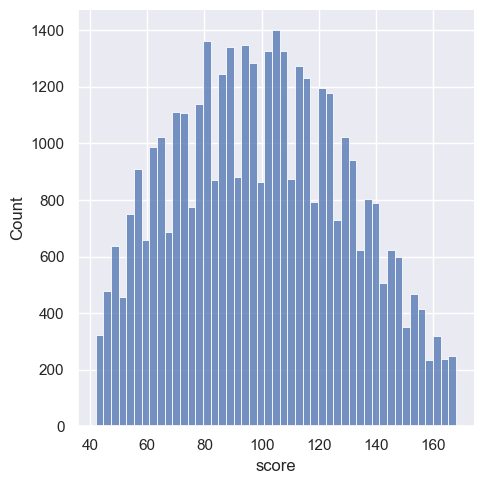

In [13]:
sns.displot(x=df['score'])

In [14]:
df['testelapse'] = np.sum(df[time],axis=1) / 1000
# total time is not equal to testelapse. Calculated elapsed time seems much more 
# reliable than testElapse. I changed testelapse with calculated time.

In [15]:
# now drop time related features
#df.drop(df[time],axis=1, inplace=True)
#df.drop(df[questions],axis=1, inplace= True)

Prediction goal The DASS questionaire is time consuming with 42 questions. There is a shorter version called DASS-21. But, it would be easier if we could predict DASS labels based on TIPI questions (10 questions).We do not need to use all these 10 as features because some questions (e.g., TIPI4) would be more strongly correlated to the final score than others (just based on the nature of TIPI questions).

This is NOT about accuracy of predicition. Instead, the goal here is to see how different personality types are related to individual emotional states.

So, we will plot our total score for different TIPI labels to see which of them are most relevant for our model.



### The Ten Item Personality Inventory (TIPI)


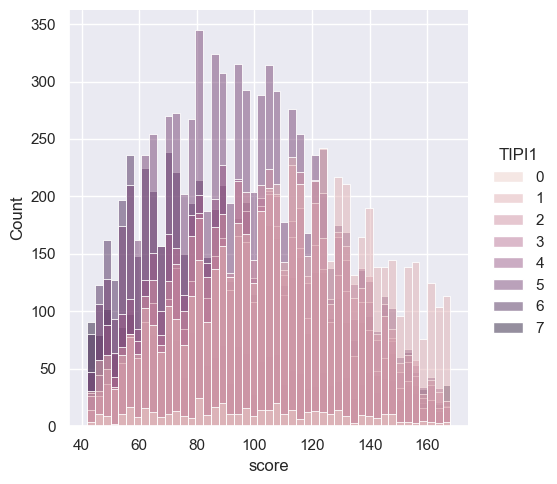

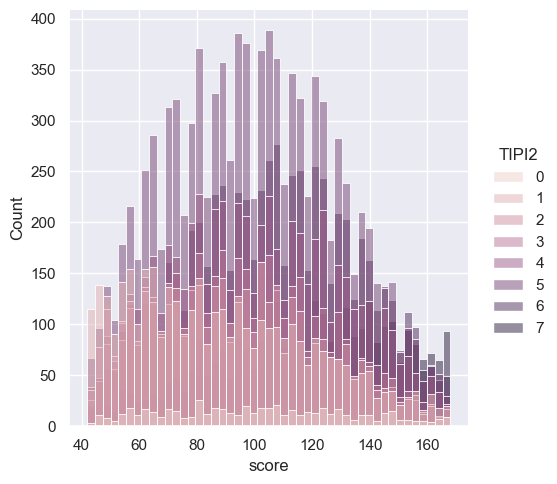

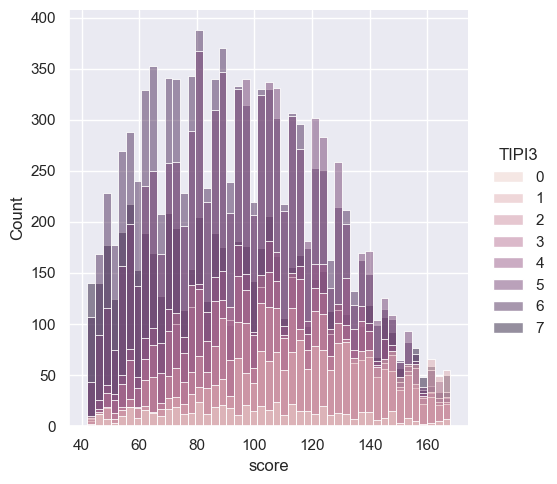

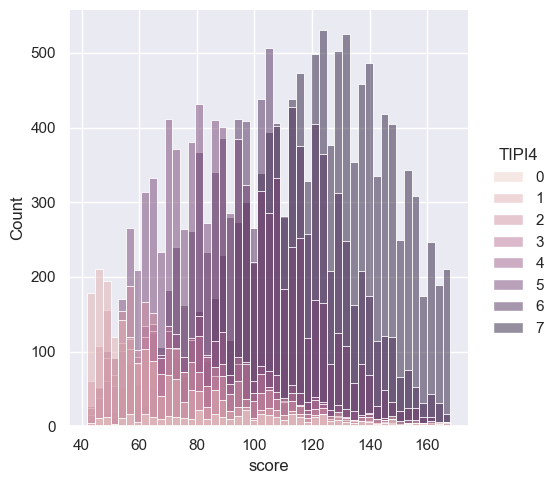

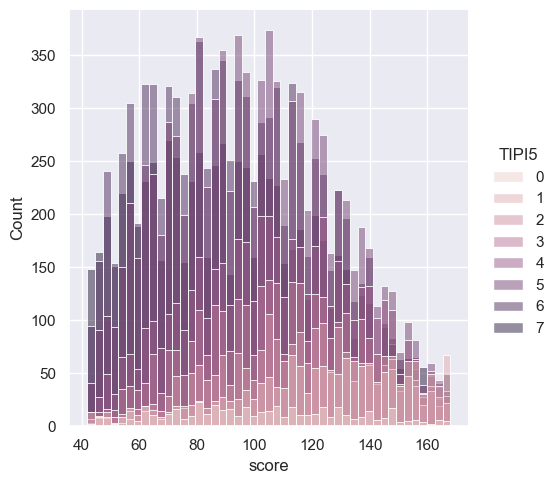

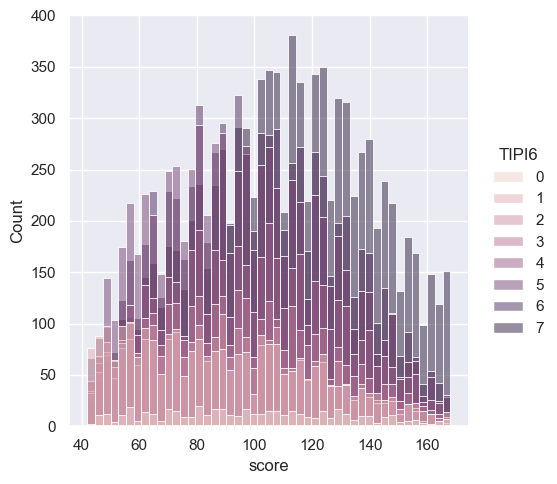

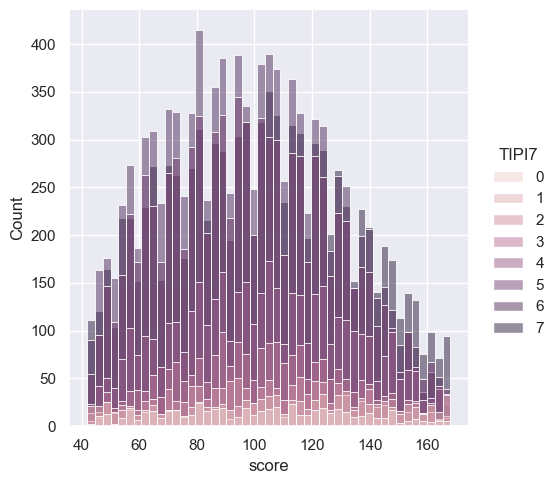

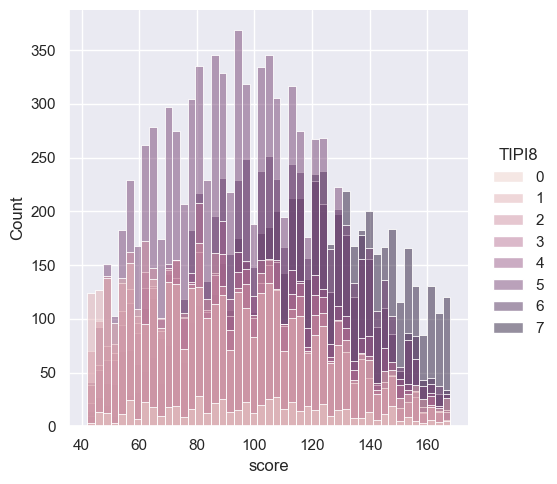

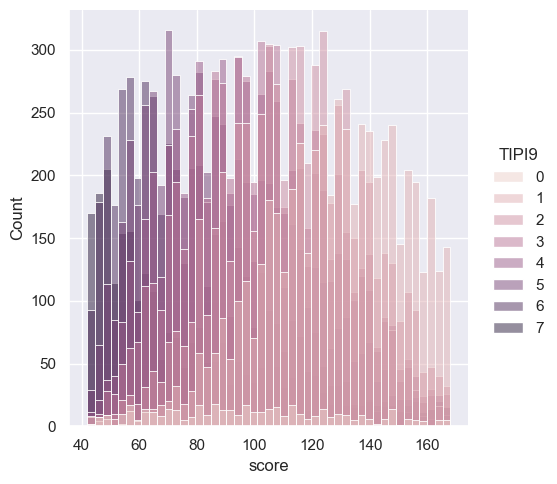

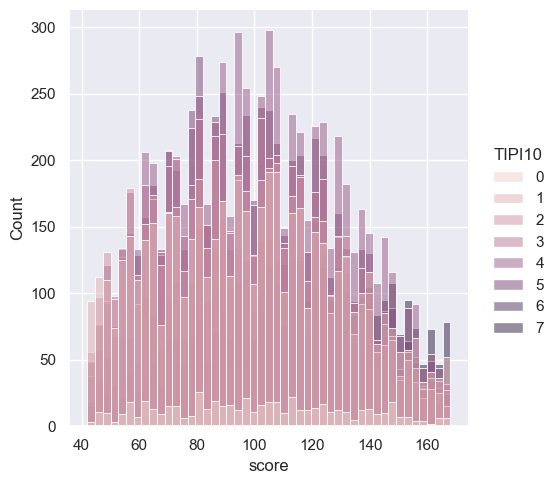

In [16]:
tipi = [f'TIPI{i}' for i in range(1, 11)]
for i in range(0,10):
    sns.displot(df,x='score',hue=tipi[i])

The Ten-Item Personality Inventory (TIPI) is a brief assessment of the Big Five personality dimensions: (1) Extraversion, (2) Agreeableness, (3) Conscientiousness, (4) Emotional Stability, and (5) Openness to Experience. Items are rated on a scale from 1, disagree strongly, to 7, agree strongly.

TIPI scale scoring (‘‘R’’ denotes reverse-scored items):

Extraversion: 1, 6R; 

Agreeableness: 2R, 7;

Conscientiousness; 3, 8R; 

Emotional Stability: 4R, 9; 

Openness to Experiences: 5, 10R

In [17]:
# TIPI
conversion = {1: 7,
              2: 6,
              3: 5,
              4: 4,
              5: 3,
              6: 2,
              7: 1}

#negative items are 2 ,4, 6, 8, 10
negative_items = ['TIPI2', 'TIPI4', 'TIPI6', 'TIPI8', 'TIPI10']

### Based on the above plots, it appears that TIPI3,4,6,8,and 9.

#### VCL

In [18]:
VCL_questions = df[[i for i in df.columns if 'VCL' in i]]


In [19]:
# renaming VCL's with words
names = ['boat',
         'incoherent', 
         'pallid',
         'robot',
         'audible', 
         'reliability_q1', 
         'paucity',
         'epistemology',
         'reliability_q2',
         'decide',
         'pastiche',
         'reliability_q3',
         'abysmal',
         'lucid',
         'betray',
         'funny']

for x,y in enumerate(names):
    df.rename(columns = {'VCL'+str(x+1) : y}, inplace = True)


for x in names:
    df[x] = df[x].astype('object')

In [20]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39775 entries, 0 to 39774
Columns: 131 entries, Q1A to score
dtypes: float64(1), int64(112), object(18)
memory usage: 39.8+ MB


In [21]:
# change categorics to category / object type
categorics = ['source', 'uniquenetworklocation', 'screensize', 'country',
'major', 'familysize', 'married', 'voted', 'race',  'orientation', 'religion',
'religion', 'hand', 'gender','engnat', 'urban', 'education']

for column in categorics:
    df[column] = df[column].astype('object')

### Major Column

In [22]:
df['major'] = df['major'].str.lower()
df['major'].value_counts().nlargest(n=50)

psychology                 1440
english                    1242
engineering                 899
business                    820
accounting                  774
law                         670
computer science            545
medicine                    446
civil engineering           444
biology                     402
science                     397
psychology                  347
education                   346
nursing                     345
mechanical engineering      327
finance                     276
architecture                267
management                  249
medical                     248
art                         243
it                          239
chemistry                   206
mathematics                 203
pharmacy                    201
engineering                 199
accounting                  197
accountancy                 193
chemical engineering        192
economics                   186
electrical engineering      173
business                    161
communic

In [23]:
#function for cleaning 'major' column
#'na' values changed with 'other' value
def simplifier(title):
    if 'business management' in str(title).lower():
        return 'management'
    elif 'information technology' in str(title).lower():
        return 'it'
    elif 'math' in str(title).lower():
        return 'mathematics'
    elif 'computer' in str(title).lower():
        return 'it'
    elif 'bio' in str(title).lower():
        return 'biology'
    elif 'tesl' in str(title).lower():
        return 'english'
    elif 'medic' in str(title).lower():
        return 'medicine'
    elif 'account' in str(title).lower():
        return 'accountacy'
    elif 'none' in str(title).lower():
        return np.nan
    elif 'nurs' in str(title).lower():
        return 'nursing'
    elif '-' in str(title).lower():
        return np.nan
    elif 'teach' in str(title).lower():
        return 'teaching'
    elif 'pharma' in str(title).lower():
        return 'pharmacy'
    elif 'no' in str(title).lower():
        return np.nan
    elif 'film' in str(title).lower():
        return 'media'
    elif 'international' in str(title).lower():
        return 'international relations'
    elif 'human' in str(title).lower():
        return 'human resources'
    elif 'art' in str(title).lower():
        return 'arts'
    elif 'islam' in str(title).lower():
        return 'islamic studies'
    elif 'physio' in str(title).lower():
        return 'physiotherapy'
    elif 'socio' in str(title).lower() or 'social' in str(title).lower():
        return 'sociology'
    elif 'bank' in str(title).lower():
        return 'banking'
    elif 'agri' in str(title).lower():
        return 'agriculture'
    elif 'commerce' in str(title).lower() or 'real estate' in str(title).lower():
        return 'marketing'
    elif 'counsel' in str(title).lower():
        return 'counselling'
    elif 'programming' in str(title).lower():
        return 'it'
    elif 'civil' in str(title).lower():
        return 'engineering'
    elif 'ict' in str(title).lower():
        return 'it'
    elif 'communication' in str(title).lower():
        return 'communication'
    elif 'administration' in str(title).lower():
        return 'administration'
    elif 'psycho' in str(title).lower():
        return 'psychology'
    elif 'english' in str(title).lower():
        return 'english'
    elif 'law' in str(title).lower():
        return 'laws'
    elif 'engineering' in str(title).lower():
        return 'engineering'
    elif 'architecture' in str(title).lower():
        return 'architecture'
    elif 'design' in str(title).lower():
        return 'designer'
    else:
        return title

In [24]:
df['major'] = df['major'].apply(simplifier)


### Education Column 

The education column has some errors. It should have 1,2,3 and 4; however it has 0's as well as 0's,1's and 2's have filled Major column.

We changed as follows;

In [25]:
df['education'].value_counts()


3    15120
2    15066
4     5008
1     4066
0      515
Name: education, dtype: int64

In [26]:
df[df['education']==0]['major'].notnull().sum()


355

In [27]:
# change 0's to 3 
edu_zero = df[(df['major'].notnull()) & ((df['education'] == 0))]
edu_zero['education'] = 3
df.loc[edu_zero.index, 'education'] = edu_zero['education']

#change 0's major to 'no degree', and 0 to 1
major_zero = df[(df['major'].isnull()) & ((df['education'] == 0))]
major_zero['major'] = 'without a degree'
major_zero['education'] = 1
df.loc[major_zero.index, 'major'] = major_zero['major']
df.loc[major_zero.index, 'education'] = major_zero['education']

In [28]:
# change 1's to 3 
edu_one = df[(df['major'].notnull()) & ((df['education'] == 1))]
edu_one['education'] = 3
df.loc[edu_one.index, 'education'] = edu_one['education']

#change 1's major to 'without a degree'
major_one = df[(df['major'].isnull()) & ((df['education'] == 1))]
major_one['major'] = 'without a degree'
df.loc[major_one.index, 'major'] = major_one['major']

In [29]:
# change 2's to 3 
edu_two = df[(df['major'].notnull()) & ((df['education'] == 2))]
edu_two['education'] = 3
df.loc[edu_two.index, 'education'] = edu_two['education']

#change 2's major to 'no degree'
major_two = df[(df['major'].isnull()) & ((df['education'] == 2))]
major_two['major'] = 'without a degree'
df.loc[major_two.index, 'major'] = major_two['major']

First, we changed Education to 3 where major is not null. After, changed major to 'no degree' where Education is equal to 0.

on the next cell, changed education to 3 where major is is not null and education is equal to 1. Did the same thing for education == 2. Also, changed major to 'no degree' where education is equal to 1 and 2

In [30]:
df['education'].value_counts()


3    24017
2     7331
4     5008
1     3419
Name: education, dtype: int64

In [31]:
df['education'] = df['education'].astype('object')


In [32]:
df['major'].isna().sum()


1455

In [33]:
df['major'] = df.groupby('education')['major'].apply(lambda x: x.fillna(x.mode()[0]))


In [34]:
df['major'].value_counts()


without a degree                            10910
engineering                                  4843
psychology                                   1917
english                                      1589
it                                           1456
                                            ...  
therapeutic recreation                          1
coding                                          1
occupational therapist                          1
health education                                1
&#22810;&#23186;&#39636;&#35373;&#35336;        1
Name: major, Length: 2044, dtype: int64

In [35]:
## changing major names to 'other' if less than 60
s = df['major'].value_counts()
df['major'] = np.where(df['major'].isin(s.index[s < 60]), 'Other', df['major'])

In [36]:
##there were 'no' values which i cant change with simplifier function
df['major'] = df['major'].apply(lambda x: x.replace('no','without a degree'))
df['major'] = df['major'].apply(lambda x: x.replace('without a degree','no degree'))

## Data Cleaning

In [37]:
#Some inputs are based on birth year so we are changing those inputs to age
#There is also couple of unrealistic birth years
df['age'] = df['age'].apply(lambda x: 2019-x if x > 1798 else x)

In [38]:
df.drop(df[df['age'] > 100].index, inplace = True)


In [39]:
df['gender'].replace({0:3},inplace=True)


In [40]:
df['orientation'].replace({0:5}, inplace=True)


In [41]:
df['religion'].replace({0:2}, inplace=True)


In [42]:
#Changing zeros to 3 as no 
df['married'].replace({0:3}, inplace=True)


In [43]:
df['hand'].replace({0:3}, inplace = True)


In [44]:
#Changing zeros to four as a other
df['urban'].replace({0:4}, inplace=True)

In [45]:
df.drop(df[df['familysize'] > 14].index, inplace=True)
#They might misunderstood question
df['familysize'].replace({0:1}, inplace=True)

In [46]:
df['voted'].replace({0:2}, inplace=True)


In [47]:
# Impute missings in TIPI
imputer = KNNImputer()


In [48]:
 ##filling null values in country column with mode
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['country'] = df['country'].apply(lambda x: x.replace('NONE','MY'))
## Changing 'XK' code to 'RS' code because 'XK' code not in 'country_alpha2_to_country_name'
df['country'] = df['country'].apply(lambda x: x.replace('XK','RS'))

In [49]:
##Converting ISO 2 code to ISO 3 code
df['country_alpha_3'] = df['country'].apply(lambda x: country_name_to_country_alpha3(country_alpha2_to_country_name(x)))
df.drop(['country'], axis = 1, inplace=True)

In [50]:
df['country_alpha_3'].value_counts().nlargest(n=20)


MYS    22128
USA     8202
GBR     1179
CAN      978
IDN      884
PHL      749
AUS      607
IND      446
DEU      314
SGP      292
NZL      215
FRA      187
BRA      180
POL      172
BRN      171
MEX      154
ROU      143
ITA      138
NLD      114
ESP       90
Name: country_alpha_3, dtype: int64

### Vocabulary Assesment (VCL)

There were 16 items in VCL, it was asked examinee's whether they know or don't know given vocabulary. 3 given words are not actual words which are used as reliability items.

We created a sumation of VCL; each correct word is +1, and reliability items are -1 each.



In [51]:
VCL_questions.columns
VCL_positives = ['VCL1', 'VCL2', 'VCL3', 'VCL4', 'VCL5','VCL7', 'VCL8', 'VCL10', 'VCL11', 
                 'VCL13', 'VCL14', 'VCL15', 'VCL16']
VCL_negatives = ['VCL6', 'VCL9', 'VCL12']

In [52]:
df['total_vocabulary'] = np.sum(VCL_questions[VCL_positives], axis=1) - np.sum(VCL_questions[VCL_negatives],axis=1)

## VISUALS

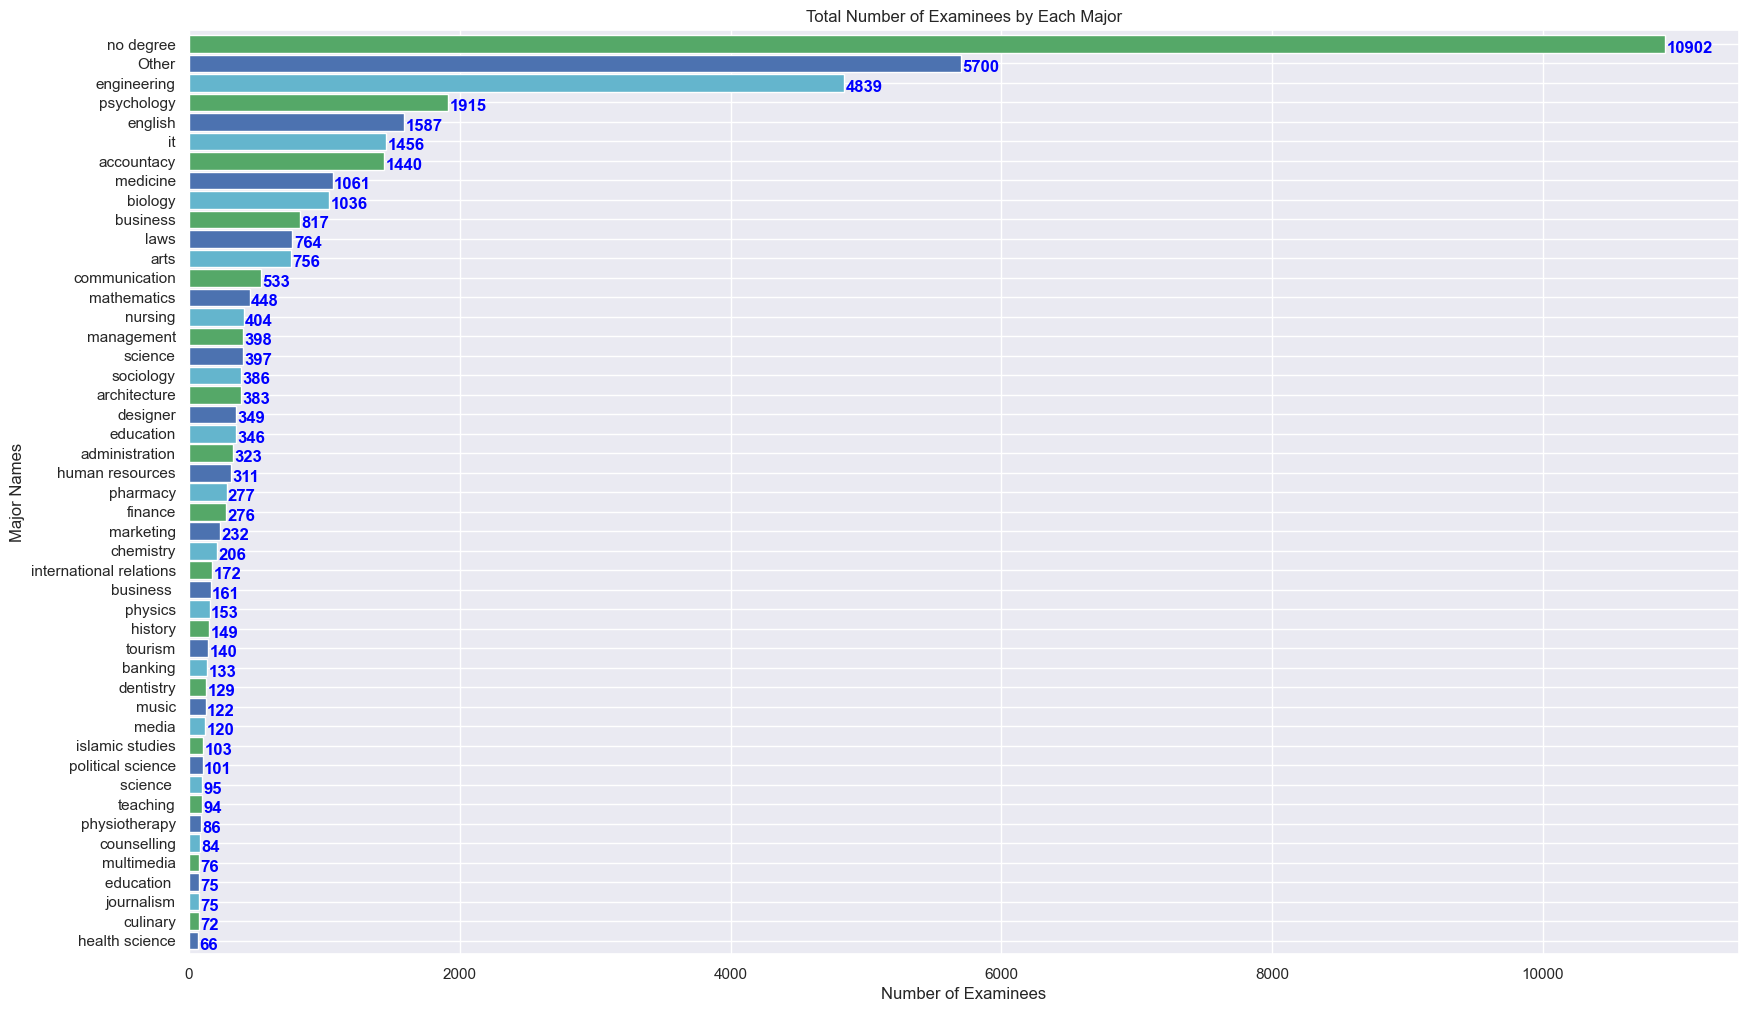

In [53]:
plt.figure(figsize=(20,12))
df['major'].value_counts().sort_values(ascending= True).plot(kind='barh', 
                                                             width = 0.9,
                                                             color=list('bgc'))

for i, v in enumerate(df['major'].value_counts().sort_values(ascending= True)):
    plt.text(v + 10, i - 0.45, str(v), color='blue', fontweight='bold')

_ = plt.xlabel("Number of Examinees")
_ = plt.ylabel("Major Names")
_ = plt.title('Total Number of Examinees by Each Major')


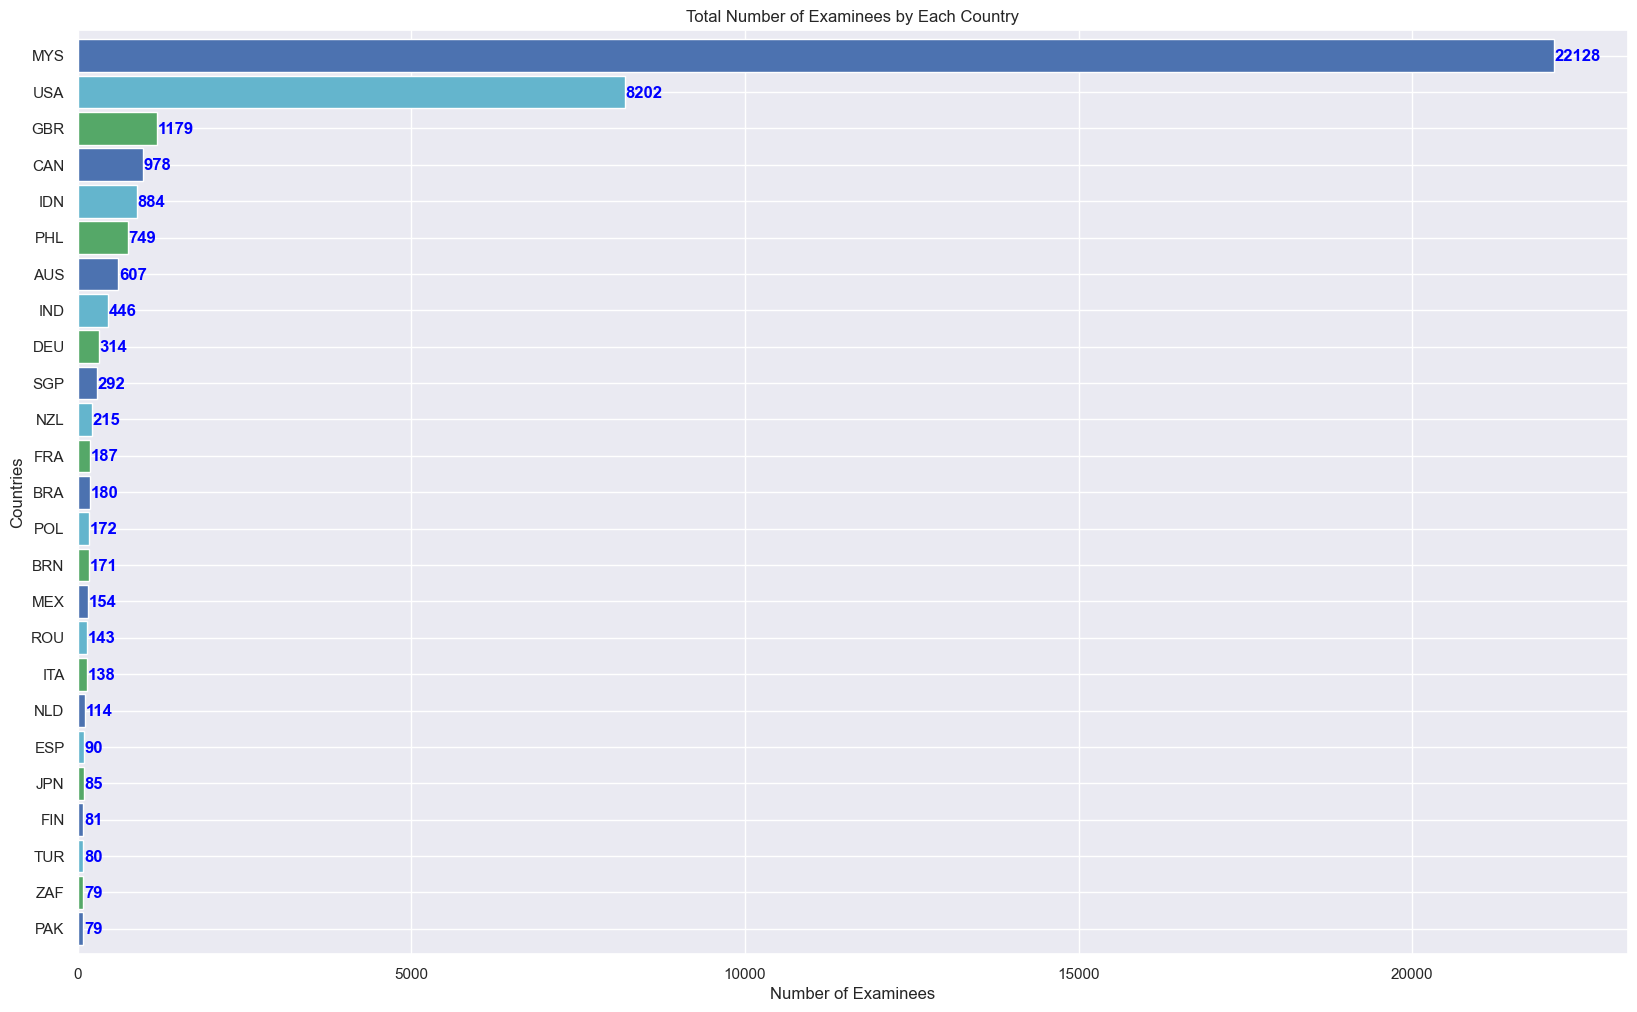

In [54]:
plt.figure(figsize=(20,12))
df['country_alpha_3'].value_counts()[:25].sort_values(ascending= True).plot(kind='barh', 
                                                             width = 0.9,
                                                             color=list('bgc'))

for i, v in enumerate(df['country_alpha_3'].value_counts()[:25].sort_values(ascending= True)):
    plt.text(v + 10, i - 0.15, str(v), color='blue', fontweight='bold')

_ = plt.xlabel("Number of Examinees")
_ = plt.ylabel("Countries")
_ = plt.title('Total Number of Examinees by Each Country')

Majority of the participants are from Malesia, and the sample is not equally distributed; therefore we cannot assume this sample size reflect the entire population. The same is present for major.



### DASS

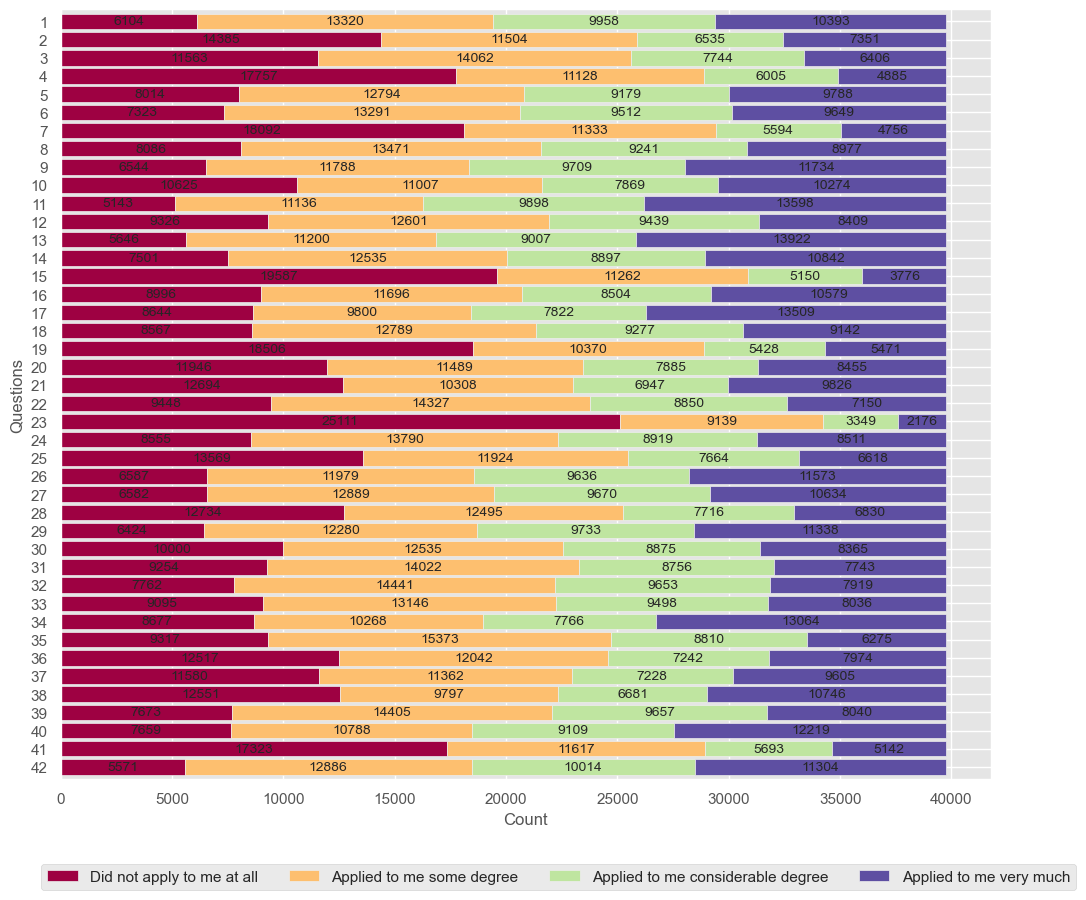

In [55]:
# TO PLOT STACKING BARH for DASS ITEMS

# first create a DF with value_counts of each item
counts = []
for col in dass.columns:
  counts.append([dass[col].value_counts()[1], 
                dass[col].value_counts()[2],
                dass[col].value_counts()[3],
                dass[col].value_counts()[4]])
  
#convert list to DF
count = pd.DataFrame(counts, columns =['Did not apply to me at all',
                                       'Applied to me some degree',
                                       'Applied to me considerable degree',
                                       'Applied to me very much'])

count['item'] = dass.columns
# extract numbers in Items column
count['item'] = count.item.str.extract(('(\d+)'))
#save item as INT
count['item'] = count['item'].astype('int32') 



# Now plot
#create a plot object
_ = plt.style.use('ggplot')

_ = count.sort_values('item', ascending=False).plot(x='item', 
           kind='barh',
           stacked=True,
           width = 0.85, 
           legend = True,
           colormap='Spectral',
           figsize= (12,10)
           )
plt.xlabel("Count")
plt.ylabel("Questions")

plt.legend( bbox_to_anchor = (1.1, -0.1), ncol=len(count.columns))

# add count of each response
for p in _.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         _.annotate(f'{width:0.0f}', xy=(left+width/2, bottom+height/2), ha='center', va='center',)


The following items were answered as the examinee's felt that way most of the time:

Question 11: I found myself getting upset rather easily.

Question 13: I felt sad and depressed.

Question 18: I felt that I was rather touchy.

Question 34: I felt I was pretty worthless.

Question 40: I was worried about situations in which I might panic and make a fool of myself.

On the other hand, following items were answered as the examinee's felt that way nearly never:

Question 15: I had a feeling of faintness.

Question 23: I had difficulty in swallowing.

It is obvious that most of the participants had mental / emotional symptoms of ADS; and do not have physical symptoms.

In [56]:
selected_questions = ['Q2E','Q4E','Q7E','Q15E','Q19E','Q23E','Q25E','Q41E']
ps_questions = dict(testelapse[selected_questions])
all_questions = dict(testelapse)

colors = []
for i in all_questions.keys():
    if i in ps_questions.keys():
        colors.append('g')
    else:
        colors.append('b')

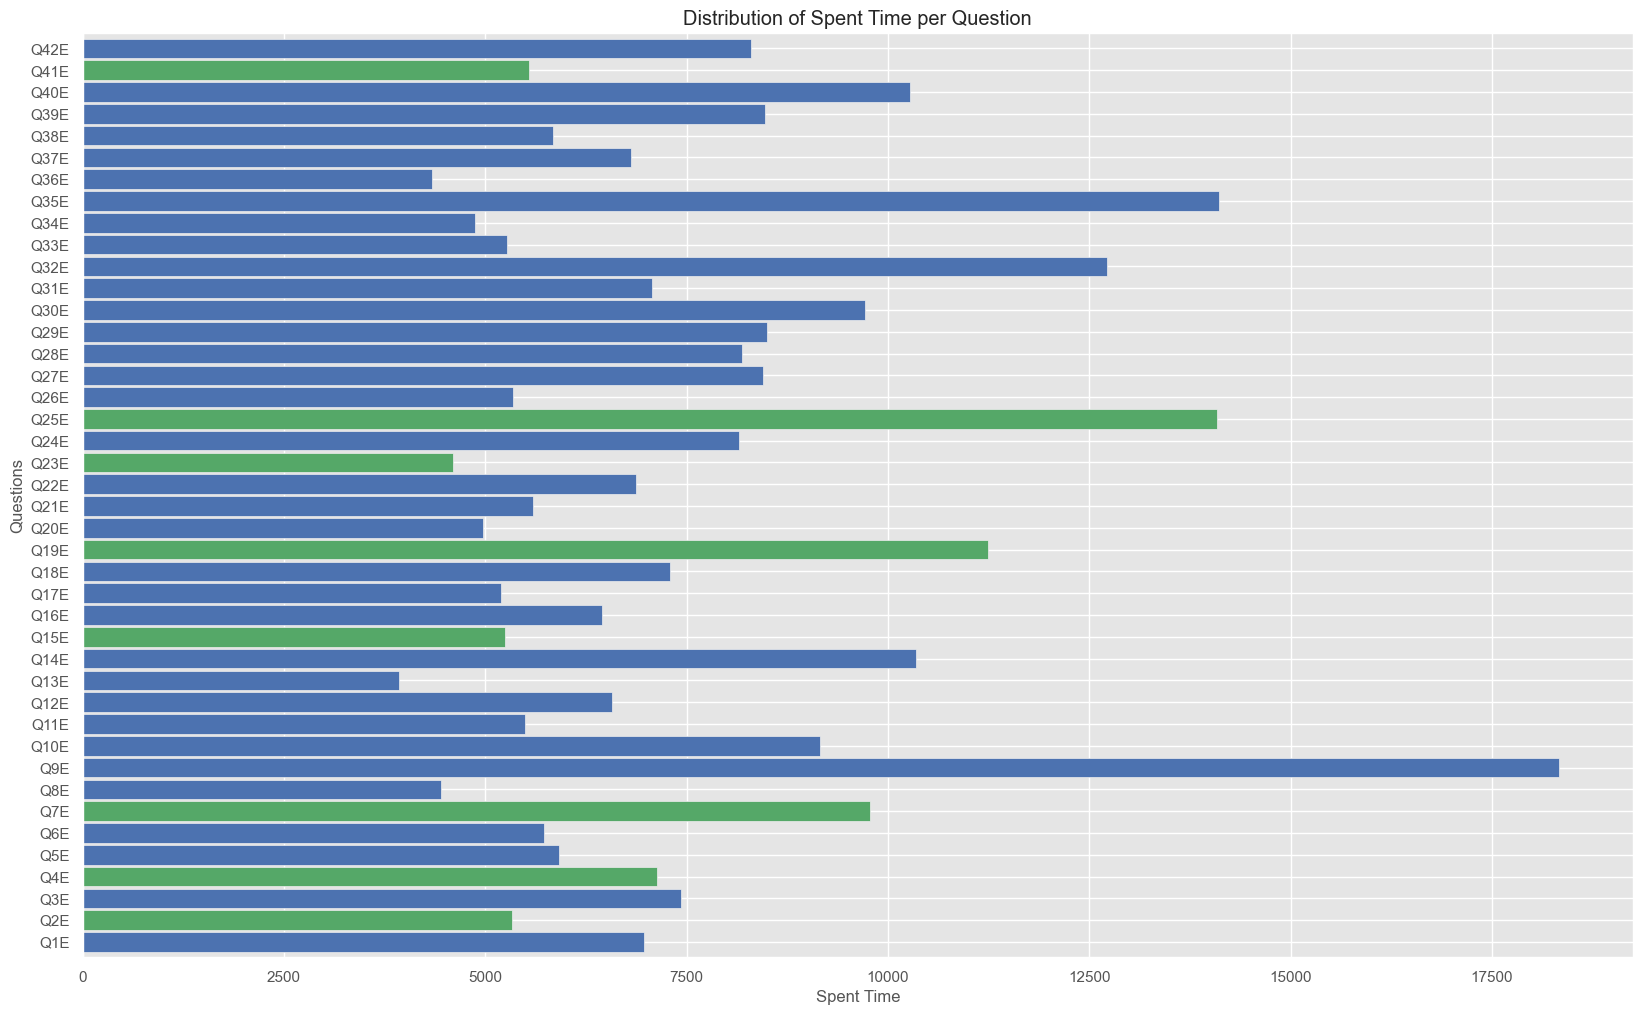

In [57]:
plt.figure(figsize=(20,12))
testelapse[[x for x in testelapse.columns if 'E' in x]].mean().plot(kind='barh', 
                                                                    width = 0.9,
                                                                    color=colors,
                                                                  )
_ = plt.xlabel("Spent Time")
_ = plt.ylabel("Questions")
_ = plt.title("Distribution of Spent Time per Question")

The highest time spent on Question 9, followed by 35 and 25.

Minorities and disadventagenous groups have higher DASS scores. However, group participant distributions in this study are way too much unbalanced. Therefore, it is really hard to make general assumptions rather than having a general idea what is going on.

Male gender obviously have lower DASS scores.

It is also hard to make assumptions about race, however we can have a better idea of asian, arab and black participants. Arabs have the highest DASS score among three groups. Apart from groups; all race groups have DASS scores higher than 100.



Depression, anxiety and stress levels are getting lower by age. While anxiety causes physical symptoms, stress causes mental symptoms on all ages. Apart from that, depression causes both symptoms.



### TIPI

In [58]:
def correlation_plot(df, cmap='RdBu_r'):
    fig, ax = plt.subplots(figsize=(12,12))
    corr = df.corr()

    matshow = ax.matshow(corr, cmap=cmap)
    for (x, y), z in np.ndenumerate(corr):
        ax.text(y, x, '{:0.2f}'.format(z), ha='center', va='center',
                bbox=dict(boxstyle='round', facecolor='white', edgecolor='0.3'))

    plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14, rotation=90)
    plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=14)
    cb = plt.colorbar(matshow, orientation="horizontal")
    ax.tick_params(labelsize=12)
    plt.show()

In [59]:
personality_values = [x for x in df.columns if 'TIPI' in x]
personalities = df[personality_values]

Emotional stability is negatively correlated with DASS items. Emotionally unstable (or less stable) individuals suffer more from depression, anxiety and stress.


In [60]:
def buildlabel(value):
    if value <= 30:
        return 'Normal'
    if 31 <= value <= 40:
        return 'Mild'
    if 41 <= value <= 60:
        return 'Moderate'
    if 61 <= value <= 80:
        return 'Severe'
    if value > 80:
        return 'Extremely Severe'

    
df['label'] = df['score'].apply(buildlabel)

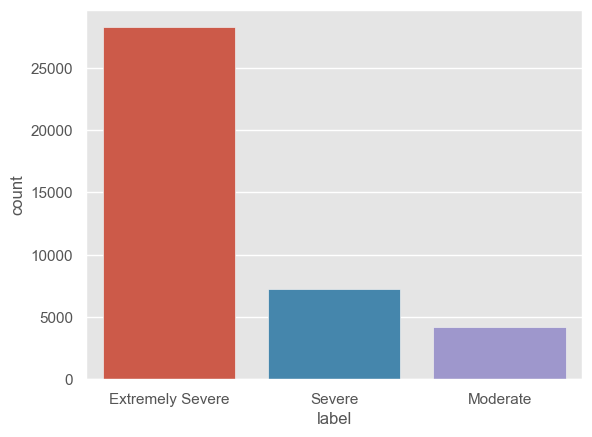

In [61]:
sns.countplot(x=df['label']);

In [62]:
target=df['label']

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['TIPI3','TIPI4','TIPI6','TIPI8','TIPI9']], target, test_size=.35)

print(f'x_train: {x_train.shape}, y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}, y_test: {y_test.shape}')

x_train: (25836, 5), y_train: (25836,)
x_test: (13912, 5), y_test: (13912,)


We will first try logistic regression,randomforest, followed by SVM. Here, the goal is not about achieving a certain level of accuracy. It is rather to find if personality types can be used to predict overall emotional state reflected in Q1-42. We want to stick with the simplest model.

In [64]:
from sklearn.linear_model import LogisticRegression
modelLR=LogisticRegression()
modelLR.fit(x_train, y_train)
modelLR.score(x_test, y_test)

0.7402961472110409

This is pretty good number >0.5, which suggests that there is a good correlation between personality traits and overall emotional state. Let us see if other methods yield anything better.

In [65]:
predictions = modelLR.predict(x_test)
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

                  precision    recall  f1-score   support

Extremely Severe       0.78      0.96      0.86      9839
        Moderate       0.54      0.44      0.48      1508
          Severe       0.37      0.08      0.13      2565

        accuracy                           0.74     13912
       macro avg       0.56      0.49      0.49     13912
    weighted avg       0.68      0.74      0.68     13912



Accuracy much better for extremely severe cases

In [66]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, n_jobs=-1)
model.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [67]:
model.score(x_test, y_test)

0.7092438182863715

Random Forest are not definitely superior to logistic regression in this case. So, we guess that SVC wont be any better.

In [68]:
predictions = model.predict(x_test)
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

                  precision    recall  f1-score   support

Extremely Severe       0.80      0.89      0.84      9839
        Moderate       0.45      0.37      0.40      1508
          Severe       0.32      0.21      0.26      2565

        accuracy                           0.71     13912
       macro avg       0.52      0.49      0.50     13912
    weighted avg       0.67      0.71      0.69     13912



Clearly, the prediction is better in Extremely severe cases! Given the performance of randomclassifier above, it is plausible that SVM may not yield a better result. Nonetheless, let us try to check.

In [69]:
from sklearn.svm import SVC

modelSVC = SVC()

modelSVC.fit(x_train, y_train)

SVC()

In [70]:
modelSVC.score(x_test, y_test)

0.7403680276020701

In [71]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

                  precision    recall  f1-score   support

Extremely Severe       0.80      0.89      0.84      9839
        Moderate       0.45      0.37      0.40      1508
          Severe       0.32      0.21      0.26      2565

        accuracy                           0.71     13912
       macro avg       0.52      0.49      0.50     13912
    weighted avg       0.67      0.71      0.69     13912



SVC does only slightly better than random forest. However, the important point is that we are able to predict emotional state pretty well based on only five personality traits


we will calculate three different scores: S, A, and D scores in addition to a total score.

Our goal is to see if we can get a better prediction of S, A, and D scores rather than a total score. For instance, we would expect that TIPI4 should correlate very well with Anxiety (or A) score.

We will only use Logistic Regression as that seems to do a sufficiently good job among three methods we tested.

In [72]:
stress=[1, 6, 8, 11, 12, 14, 18, 22, 27, 29, 32, 33, 35, 39]
anxiety=[2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41]
depression=[3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42]

In [73]:
qnum = [f'Q{i}A' for i in stress]
df['stress']=0
for i in range(len(qnum)):
  df['stress']=df['stress']+df[qnum[i]]

Now, we build categories in stress. Recall that we are using DASS 42 scoring system 

In [74]:
def buildlabel(value):
    if value <= 14:
        return 'S-Normal'
    if 15 <= value <= 18:
        return 'S-Mild'
    if 19 <= value <= 25:
        return 'S-Moderate'
    if 26 <= value <= 33:
        return 'S-Severe'
    if value > 33:
        return 'S-Extremely Severe'

    
# build target feature
df['S'] = df['stress'].apply(buildlabel)

In [75]:
target=df['S']

In [76]:
target

0        S-Extremely Severe
1        S-Extremely Severe
2                  S-Severe
3                  S-Severe
4        S-Extremely Severe
                ...        
39770              S-Severe
39771    S-Extremely Severe
39772            S-Moderate
39773    S-Extremely Severe
39774              S-Severe
Name: S, Length: 39748, dtype: object

Let us see if we can predict stress scores better using TIPI 3,4,6,8,9

In [77]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['TIPI3','TIPI4','TIPI6','TIPI8','TIPI9']], target, test_size=.35)

print(f'x_train: {x_train.shape}, y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}, y_test: {y_test.shape}')

x_train: (25836, 5), y_train: (25836,)
x_test: (13912, 5), y_test: (13912,)


In [78]:
from sklearn.linear_model import LogisticRegression
modelLR=LogisticRegression()
modelLR.fit(x_train, y_train)
modelLR.score(x_test, y_test)

0.597757331799885

We expect that the prediction should be better in extreme severity. Let us check.

In [79]:
predictions = modelLR.predict(x_test)
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

                    precision    recall  f1-score   support

S-Extremely Severe       0.69      0.90      0.78      7711
            S-Mild       0.45      0.11      0.17       681
        S-Moderate       0.38      0.35      0.36      2095
          S-Normal       0.00      0.00      0.00       126
          S-Severe       0.34      0.18      0.23      3299

          accuracy                           0.60     13912
         macro avg       0.37      0.31      0.31     13912
      weighted avg       0.54      0.60      0.55     13912



Now, we will try the same thing for anxiety followed by depression scored from DASS 42.

In [81]:
qnum = [f'Q{i}A' for i in anxiety]
df['anxiety']=0
for i in range(len(qnum)):
    df['anxiety']=df['anxiety']+df[qnum[i]]

In [82]:
def buildlabel(value):
    if value <= 7:
        return 'Normal'
    if 8 <= value <= 9:
        return 'Mild'
    if 10 <= value <= 14:
        return 'Moderate'
    if 15 <= value <= 19:
        return 'Severe'
    if value > 19:
        return 'Extremely Severe'

    
# build target feature
df['A'] = df['anxiety'].apply(buildlabel)

In [83]:
target=df['A']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['TIPI3','TIPI4','TIPI6','TIPI8','TIPI9']], target, test_size=.35)

print(f'x_train: {x_train.shape}, y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}, y_test: {y_test.shape}')
from sklearn.linear_model import LogisticRegression
modelLR=LogisticRegression()
modelLR.fit(x_train, y_train)
modelLR.score(x_test, y_test)

x_train: (25836, 5), y_train: (25836,)
x_test: (13912, 5), y_test: (13912,)


0.8366158711903393

Clearly, anxiety rating is more accurately predictable based on the above questions, particularly TIPI4. Indeed, removing TIPI 3,6,8,9 can still give you a similar score. Let us check it out

In [84]:
target=df['A']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['TIPI4']], target, test_size=.35)

print(f'x_train: {x_train.shape}, y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}, y_test: {y_test.shape}')

from sklearn.linear_model import LogisticRegression
modelLR=LogisticRegression()
modelLR.fit(x_train, y_train)
modelLR.score(x_test, y_test)

x_train: (25836, 1), y_train: (25836,)
x_test: (13912, 1), y_test: (13912,)


0.8223835537665325

Indeed!!! We are able to predict the score of a subset of 42 questions related to anxiety [2, 4, 7, 9, 15, 19, 20, 23, 25, 28, 30, 36, 40, 41] solely based on a single feature TIPI4, which suggests that personality types play an important role in mental health!

Let us now try for the final one: depression [3, 5, 10, 13, 16, 17, 21, 24, 26, 31, 34, 37, 38, 42]

In [85]:
qnum = [f'Q{i}A' for i in depression]
df['depression']=0
for i in range(len(qnum)):
  df['depression']=df['depression']+df[qnum[i]]

In [86]:
def buildlabel(value):
    if value <= 9:
        return 'Normal'
    if 10 <= value <= 13:
        return 'Mild'
    if 14 <= value <= 20:
        return 'Moderate'
    if 21 <= value <= 27:
        return 'Severe'
    if value > 27:
        return 'Extremely Severe'

    
# build target feature
df['D'] = df['depression'].apply(buildlabel)

In [87]:
target=df['D']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df[['TIPI3','TIPI4','TIPI6','TIPI8','TIPI9']], target, test_size=.35)

print(f'x_train: {x_train.shape}, y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}, y_test: {y_test.shape}')
from sklearn.linear_model import LogisticRegression
modelLR=LogisticRegression()
modelLR.fit(x_train, y_train)
modelLR.score(x_test, y_test)

x_train: (25836, 5), y_train: (25836,)
x_test: (13912, 5), y_test: (13912,)


0.7177975848188615

Again, we are able to see that depression score is also related to personality types.

Based on the above analysis, we can assert the following:

1) We can use The Ten Item Personality Inventory (TIPI) traits TIPI #3,4,6,8, and 9 to predict anxiety, depression, and total DASS-42 score with moderately good accuracy. This suggests that TIPI are closely linked to DASS-42 outcomes.

2) Specifically, TIPI #4 alone is able to provide a good prediction of anxiety score.

We will now proceed with hypothesis testing to address the following concern - 
Problem Question: Is there a significant difference in mean DASS scores among individuals with varying levels of anxiety, as measured by TIPI4? - Solution - Is to use ANOVA to test the same - Check SPSS file.